# Hackathon : Reinforcement Learning for Drone Navigation

- Team name: Olympus Coders
- Team members names: Loan SAMAI, Farès BENAGGOUNE, Marc Estassy BATABA

## 0. Prerequisites

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

## 1. Training

In [ ]:
trained_agent, all_rewards = simulate.multi_config_train([
    "eval_configs/config_4.json",
    "eval_configs/config_6.json",
    "eval_configs/config_2.json",
    "eval_configs/config_5.json"
], checkpoint_path="multi_config_checkpoint.pth", save_interval=100)


🚀 Début de l'entraînement multi-configurations 🚀

Tentative de chargement du checkpoint: multi_config_checkpoint.pth
Checkpoint chargé avec succès depuis multi_config_checkpoint.pth !
Épisode 1/500, Reward: 1816.30
Épisode 2/500, Reward: -3198.60
Épisode 3/500, Reward: 2390.25
Épisode 4/500, Reward: 1052.65
Épisode 5/500, Reward: 343.15
Épisode 6/500, Reward: -758.20
Épisode 7/500, Reward: -1117.05
Épisode 8/500, Reward: -1089.20
Épisode 9/500, Reward: -864.30
Épisode 10/500, Reward: 2139.65
Épisode 11/500, Reward: -1634.75
Épisode 12/500, Reward: 2918.55
Épisode 13/500, Reward: 1306.70
Épisode 14/500, Reward: 1506.85
Épisode 15/500, Reward: 1940.55
Épisode 16/500, Reward: 3636.05
Épisode 17/500, Reward: 2175.90
Épisode 18/500, Reward: -2687.60
Épisode 19/500, Reward: 3711.85
Épisode 20/500, Reward: 12.00
Épisode 21/500, Reward: -938.25
Épisode 22/500, Reward: 2811.90
Épisode 23/500, Reward: 1653.20
Épisode 24/500, Reward: -54.65
Épisode 25/500, Reward: -2092.85
Épisode 26/500, Reward

In [7]:
# On peut passer un seul fichier de configuration ou une liste de plusieurs configs
# Exemple avec une seule config : trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json"])
# Exemple avec plusieurs configs : trained_agent, all_rewards = simulate.multi_config_train(["train_configs/config_1.json", "train_configs/config_3.json", "train_configs/config_7.json"])

trained_agent, all_rewards = simulate.multi_config_train([
    "train_configs/config_medium.json",
    "train_configs/config_hard.json",
    "train_configs/config_hybride.json",
    "eval_configs/config_1.json"
], checkpoint_path="multi_config_checkpoint.pth", save_interval=100)


🚀 Début de l'entraînement multi-configurations 🚀

Épisode 1/500, Reward: 4230.90
Épisode 2/500, Reward: -566.20
Épisode 3/500, Reward: 4255.30
Épisode 4/500, Reward: -461.60
Épisode 5/500, Reward: -198.20
Épisode 6/500, Reward: -804.50
Épisode 7/500, Reward: -529.90
Épisode 8/500, Reward: 3670.40
Épisode 9/500, Reward: 4253.50
Épisode 10/500, Reward: -526.50
Épisode 11/500, Reward: 3976.75
Épisode 12/500, Reward: -1257.20
Épisode 13/500, Reward: -993.20
Épisode 14/500, Reward: -353.50
Épisode 15/500, Reward: 4087.85
Épisode 16/500, Reward: 586.20
Épisode 17/500, Reward: 1388.30
Épisode 18/500, Reward: 32.00
Épisode 19/500, Reward: -732.50
Épisode 20/500, Reward: -307.20
Épisode 21/500, Reward: -134.80
Épisode 22/500, Reward: -314.10
Épisode 23/500, Reward: -302.70
Épisode 24/500, Reward: 3980.05
Épisode 25/500, Reward: 3635.80
Épisode 26/500, Reward: 3198.35
Épisode 27/500, Reward: -620.60
Épisode 28/500, Reward: -639.60
Épisode 29/500, Reward: 4218.35
Épisode 30/500, Reward: 4253.40


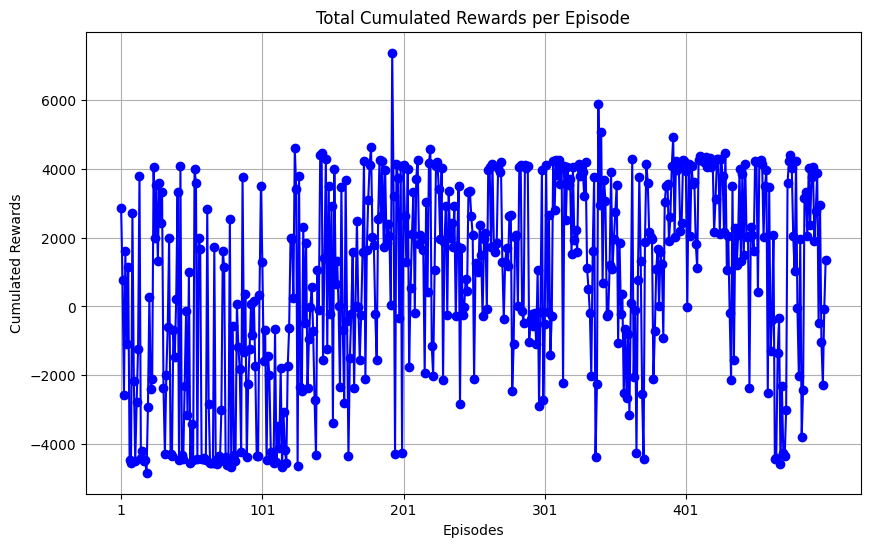

In [24]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [30]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [31]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---

--- Evaluating Configuration: ./eval_configs/config_2.json ---

--- Evaluating Configuration: ./eval_configs/config_3.json ---

--- Evaluating Configuration: ./eval_configs/config_4.json ---

--- Evaluating Configuration: ./eval_configs/config_5.json ---

--- Evaluating Configuration: ./eval_configs/config_6.json ---

--- Evaluating Configuration: ./eval_configs/config_7.json ---

--- Evaluating Configuration: ./eval_configs/config_8.json ---

--- Evaluating Configuration: ./eval_configs/config_9.json ---

--- Evaluating Configuration: ./eval_configs/config_10.json ---


In [34]:
display(all_results)

,config_path,episode,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,1,-4962.8,0,0
1,./eval_configs/config_1.json,2,-4950.4,0,0
2,./eval_configs/config_1.json,3,-4950.4,0,0
3,./eval_configs/config_1.json,4,-4950.4,0,0
4,./eval_configs/config_1.json,5,-4938.0,0,0
...,...,...,...,...,...
95,./eval_configs/config_10.json,6,-4950.4,0,0
96,./eval_configs/config_10.json,7,-4975.2,0,0
97,./eval_configs/config_10.json,8,-4950.4,0,0
98,./eval_configs/config_10.json,9,-4975.2,0,0


In [35]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)

,config_path,total_reward,evacuated_agents,deactivated_agents
0,./eval_configs/config_1.json,-4952.88,0.0,0.0
1,./eval_configs/config_10.json,-3111.74,0.0,0.0
2,./eval_configs/config_2.json,-4956.60,0.0,0.0
3,./eval_configs/config_3.json,-4939.24,0.0,0.0
4,./eval_configs/config_4.json,-1884.12,0.0,0.0
5,./eval_configs/config_5.json,603.64,0.0,0.0
6,./eval_configs/config_6.json,-4936.76,0.0,0.0
7,./eval_configs/config_7.json,-3671.04,0.0,0.0
8,./eval_configs/config_8.json,2023.32,0.0,0.0
9,./eval_configs/config_9.json,-4326.60,0.0,0.0
